### Import all necessary libraries

In [1]:
!pip install keras_preprocessing
# pip install keras
# pip install tensorflow

     ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import ResNet152V2

In [2]:
img=load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS - Copy\train\क\5_क.jpg")

In [3]:
type(img)

PIL.Image.Image

In [4]:
img=img_to_array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


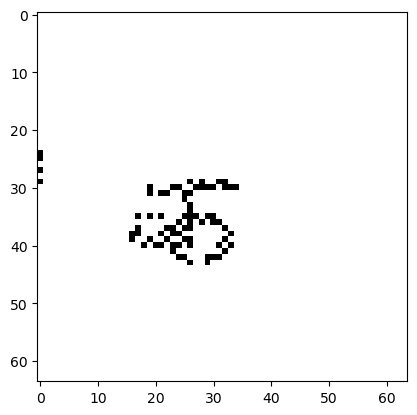

In [5]:
plt.imshow(img)

In [6]:
img.shape

(64, 64, 3)

### Build the CNN model

In [7]:
model=Sequential()

model.add(Conv2D(32, input_shape=(64,64,3), kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(51,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

### Visualize the model

In [9]:
plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile the model

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

### Import the dataset

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datsgen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [22]:
test_datsgen=ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [23]:
training_set=train_datsgen.flow_from_directory(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS - Copy\train",
                                              target_size=(64, 64),
                                              class_mode='categorical')

Found 2214 images belonging to 51 classes.


In [24]:
test_set=train_datsgen.flow_from_directory(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS - Copy\val",
                                              target_size=(64, 64),
                                              class_mode='categorical')

Found 600 images belonging to 51 classes.


### Train the model

In [16]:
model.fit(training_set, epochs=100)

Epoch 1/100
70/70 [==============================] - 9s 105ms/step - loss: 3.9663 - accuracy: 0.0199
Epoch 2/100
70/70 [==============================] - 7s 105ms/step - loss: 3.8811 - accuracy: 0.0506
Epoch 3/100
70/70 [==============================] - 7s 103ms/step - loss: 3.6186 - accuracy: 0.1016
Epoch 4/100
70/70 [==============================] - 7s 104ms/step - loss: 3.2305 - accuracy: 0.1893
Epoch 5/100
70/70 [==============================] - 7s 102ms/step - loss: 2.7572 - accuracy: 0.2927
Epoch 6/100
70/70 [==============================] - 7s 101ms/step - loss: 2.2976 - accuracy: 0.4092
Epoch 7/100
70/70 [==============================] - 7s 99ms/step - loss: 1.8703 - accuracy: 0.5059
Epoch 8/100
70/70 [==============================] - 7s 98ms/step - loss: 1.4835 - accuracy: 0.6048
Epoch 9/100
70/70 [==============================] - 7s 101ms/step - loss: 1.2501 - accuracy: 0.6707
Epoch 10/100
70/70 [==============================] - 7s 99ms/step - loss: 1.0093 - accuracy:

### Evaluate on unseen data

In [17]:
model.evaluate(test_set)

19/19 [==============================] - 3s 152ms/step - loss: 1.0838 - accuracy: 0.8767


[1.083763837814331, 0.8766666650772095]

### Prediction on sample data

In [18]:
test_image=load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val\न\1_न_horizontal_flip.jpg",target_size=(64,64))

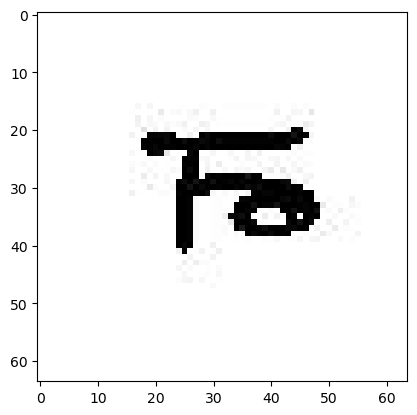

In [19]:
plt.imshow(test_image)

In [20]:
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

In [21]:
test_image.shape

(1, 64, 64, 3)

In [22]:
training_set.class_indices

{'अ': 0,
 'अं': 1,
 'अः': 2,
 'आ': 3,
 'इ': 4,
 'ई': 5,
 'उ': 6,
 'ऊ': 7,
 'ऋ': 8,
 'ए': 9,
 'ऐ': 10,
 'ओ': 11,
 'औ': 12,
 'क': 13,
 'क्ष': 14,
 'ख': 15,
 'ग': 16,
 'घ': 17,
 'ङ': 18,
 'च': 19,
 'छ': 20,
 'ज': 21,
 'ज्ञ': 22,
 'झ': 23,
 'ञ': 24,
 'ट': 25,
 'ठ': 26,
 'ड': 27,
 'ढ': 28,
 'ण': 29,
 'त': 30,
 'त्र': 31,
 'थ': 32,
 'द': 33,
 'ध': 34,
 'न': 35,
 'प': 36,
 'फ': 37,
 'ब': 38,
 'भ': 39,
 'म': 40,
 'य': 41,
 'र': 42,
 'ल': 43,
 'ळ': 44,
 'व': 45,
 'श': 46,
 'श्र': 47,
 'ष': 48,
 'स': 49,
 'ह': 50}

In [23]:
indices = training_set.class_indices

In [24]:
result = np.argmax(model.predict(test_image,verbose=False))
print(list(indices.keys())[list(indices.values()).index(result)])

न


--------

In [117]:
x=load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\1212.jpg",target_size=(64,64))

In [118]:
x=img_to_array(x)
x=np.expand_dims(x,axis=0)

In [119]:
result = np.argmax(model.predict(x,verbose=False))
print(list(indices.keys())[list(indices.values()).index(result)])

ठ


### Transfer Learning

In [16]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the pre-trained VGG16 model
model.add(base_model)

# Add your own classifier on top
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(51, activation='softmax'))

# Summary of the model
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),  # You can adjust the learning rate
              metrics=['accuracy'])

# Train the model
model.fit(training_set, epochs=100, validation_data=test_set)

# Evaluate on unseen data
model.evaluate(test_set)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dense_17 (Dense)            (None, 51)                26163     
                                                                 
Total params: 15789939 (60.23 MB)
Trainable params: 1075251 (4.10 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/100
70/70 [==============================] - 18s 256ms/step - loss: 3.8210 - accuracy: 0.0732 - val_loss: 3.4389 - val_accuracy: 0.1250
Epoch 2/100
70/70 [==============================] - 20s 290ms/step - loss: 3.1880 - accuracy: 0.1752 - val_loss: 2.9238 - val_accuracy: 0.2317
Epoch 3/100
70/70 [==============================] - 22s 310ms/step - loss: 2.7480 - accuracy: 0.2638 - val_loss: 2.4811 - val_accuracy: 0.3067
Epoch 4/100
70/70 [==============================] - 21s 302ms/step - loss: 2.3992 - accuracy: 0.3577 - val_loss: 2.2639 - val_accuracy: 0.3717
Epoch 5/100
70/70 [==============================] - 21s 304ms/step - loss: 2.1672 - accuracy: 0.4006 - val_loss: 2.0463 - val_accuracy: 0.4250
Epoch 6/100
70/70 [==============================] - 20s 288ms/step - loss: 2.0124 - accuracy: 0.4273 - val_loss: 1.9244 - val_accuracy: 0.4383
Epoch 7/100
70/70 [==============================] - 21s 294ms/step - loss: 1.8591 - accuracy: 0.4765 - val_loss: 1.8020 - val_accuracy:

KeyboardInterrupt: 

In [27]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Load the pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the pre-trained MobileNetV2 model
model.add(base_model)

# Add Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add your own classifier on top
model.add(Dense(512, activation='relu'))
model.add(Dense(51, activation='softmax'))

# Summary of the model
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train the model
model.fit(training_set, epochs=100, validation_data=test_set)

# Evaluate on unseen data
model.evaluate(test_set)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 512)               655872    
                                                                 
 dense_23 (Dense)            (None, 51)                26163     
                                                                 
Total params: 2940019 (11.22 MB)
Trainable params: 682035 (2.60 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Epoch 1/100
70/70 [==============================] - 16s 150ms/step - loss: 3.6053 - accuracy: 0.1165 - val_loss: 2.9007 - val_accuracy: 0.2533
Epoch 2/100
70/70 [==============================] - 8s 116ms/step - loss: 2.8449 - accuracy: 0.2448 - val_loss: 2.5840 - val_accuracy: 0.3283
Epoch 3/100
70/70 [==============================] - 9s 122ms/step - loss: 2.4528 - accuracy: 0.3388 - val_loss: 2.3611 - val_accuracy: 0.3633
Epoch 4/100
70/70 [==============================] - 9s 123ms/step - loss: 2.2825 - accuracy: 0.3853 - val_loss: 2.1145 - val_accuracy: 0.4267
Epoch 5/100
70/70 [==============================] - 8s 115ms/step - loss: 2.0409 - accuracy: 0.4372 - val_loss: 2.0277 - val_accuracy: 0.4317
Epoch 6/100
70/70 [==============================] - 8s 115ms/step - loss: 1.9417 - accuracy: 0.4544 - val_loss: 1.9553 - val_accuracy: 0.4550
Epoch 7/100
70/70 [==============================] - 8s 112ms/step - loss: 1.8092 - accuracy: 0.4991 - val_loss: 1.9012 - val_accuracy: 0.446

Epoch 58/100
70/70 [==============================] - 11s 158ms/step - loss: 0.5518 - accuracy: 0.8266 - val_loss: 0.9464 - val_accuracy: 0.7333
Epoch 59/100
70/70 [==============================] - 11s 160ms/step - loss: 0.5777 - accuracy: 0.8198 - val_loss: 1.0584 - val_accuracy: 0.7117
Epoch 60/100
70/70 [==============================] - 11s 160ms/step - loss: 0.6008 - accuracy: 0.8216 - val_loss: 1.0303 - val_accuracy: 0.7233
Epoch 61/100
70/70 [==============================] - 11s 158ms/step - loss: 0.5834 - accuracy: 0.8225 - val_loss: 0.8705 - val_accuracy: 0.7750
Epoch 62/100
70/70 [==============================] - 11s 154ms/step - loss: 0.5207 - accuracy: 0.8523 - val_loss: 0.9092 - val_accuracy: 0.7750
Epoch 63/100
70/70 [==============================] - 11s 153ms/step - loss: 0.5267 - accuracy: 0.8478 - val_loss: 0.9540 - val_accuracy: 0.7267
Epoch 64/100
70/70 [==============================] - 11s 155ms/step - loss: 0.5071 - accuracy: 0.8519 - val_loss: 1.0079 - val_ac

[0.8439109921455383, 0.7950000166893005]